# スケールフリーネットワーク生成

対応する動画：[【研究で使うPython】#13 NetworkXによるネットワーク分析　⑥スケールフリーネットワークの生成](https://youtu.be/uFISKHqGQAU)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## NetworkXの組み込み関数より生成

NetworkX.barabasi_albert_graph()
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 384
Average degree:   7.6800


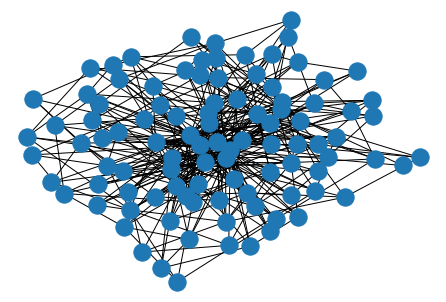

In [2]:
n = 100
m = 4

print('NetworkX.barabasi_albert_graph()')
G1 = nx.barabasi_albert_graph(n, m)
print(nx.info(G1))
nx.draw(G1)
plt.show()

## 自作関数で生成

自作関数による生成
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 384
Average degree:   7.6800


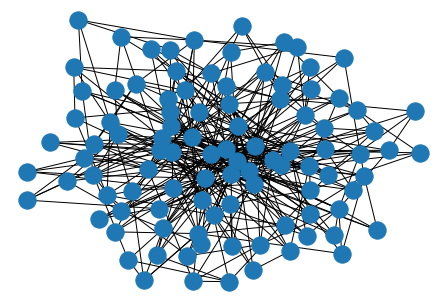

In [3]:
# 自作のスケールフリーネットワーク生成関数
def gen_BA_network(n, m, seed=None):
    if seed is not None:
        np.random.seed(seed=seed)
    
    m0 = m  # 初期ノード数
    G = nx.cycle_graph(m0)  # 初期のcycleグラフを生成
    initial_edges = list(G.edges())
    node_list = list(range(m0))
    
    # ノードを追加し、エッジを次数に比例して追加していく
    for i in range(m0, n):
        darray = np.array(G.degree())[:,1]  # 次数の配列
        
        for j in range(m):
            # 次数に比例した確率ベクトルを生成
            s = np.sum(darray)
            parray = darray / s

            # 次数に比例した確率で既存のノードを選び、エッジとする
            new = np.random.choice(node_list, p=parray)
            G.add_edge(i, new)
            
            darray[new] = 0.
        
        node_list.append(i)
    
    G.remove_edges_from(initial_edges)
    return G

n = 100
m = 4

print('自作関数による生成')
G2 = gen_BA_network(n, m)
print(nx.info(G2))
nx.draw(G2)
plt.show()

## 次数分布のグラフ

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 45, 46, 48, 50, 51, 52, 54, 58, 66, 70, 71, 74, 80, 91, 101, 112, 122, 140, 153]
[0.3325, 0.1945, 0.111, 0.0805, 0.068, 0.0315, 0.0255, 0.0265, 0.011, 0.018, 0.013, 0.007, 0.0125, 0.006, 0.0075, 0.007, 0.0055, 0.0035, 0.003, 0.0015, 0.002, 0.001, 0.0015, 0.0015, 0.003, 0.002, 0.001, 0.003, 0.001, 0.0015, 0.001, 0.0005, 0.0005, 0.0005, 0.0005, 0.001, 0.0005, 0.001, 0.0005, 0.0005, 0.0005, 0.0005, 0.001, 0.0005, 0.001, 0.001, 0.0005, 0.0005, 0.0005, 0.0005, 0.001, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005]


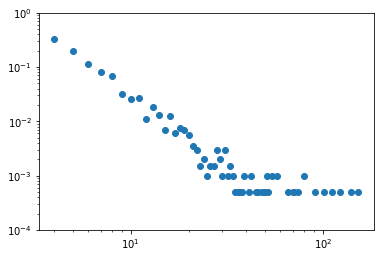

In [4]:
n = 2000
m = 4

# スケールフリーネットワークの生成
G = nx.barabasi_albert_graph(n, m) # 組み込み関数で生成
# G = gen_BA_network(n, m) # 自作関数で生成

k = [i for i,x in enumerate(nx.degree_histogram(G)) if x != 0]
degree_dist = [i/n for i in nx.degree_histogram(G) if i != 0]
print(k)
print(degree_dist)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001,1)
plt.scatter(k, degree_dist)